In [ ]:
import sys
'geopandas' in sys.modules
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

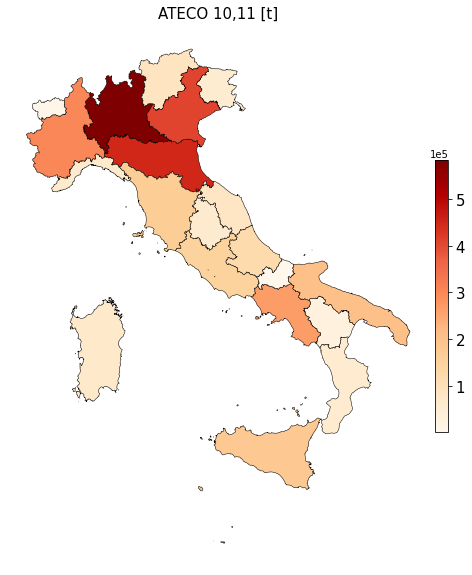

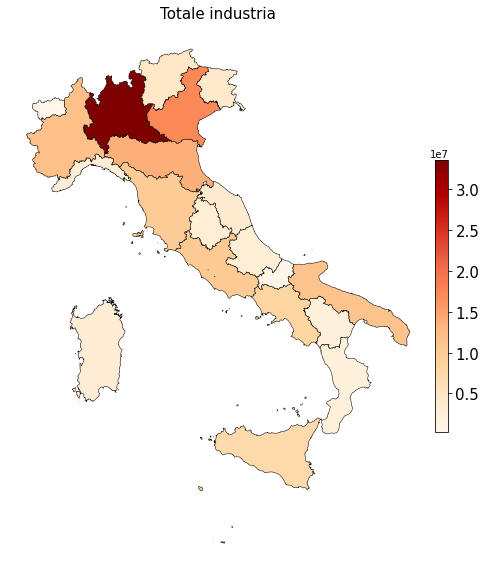

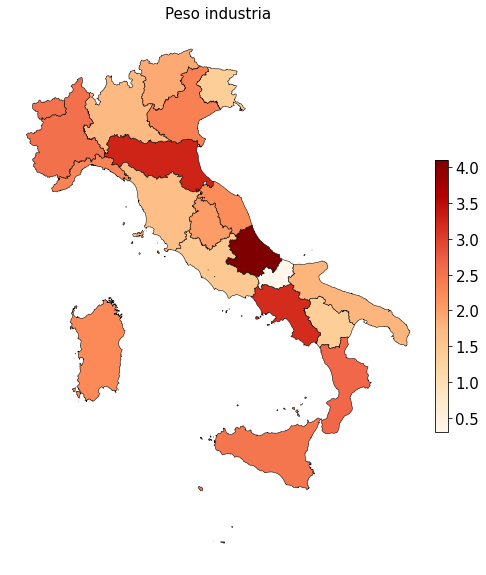

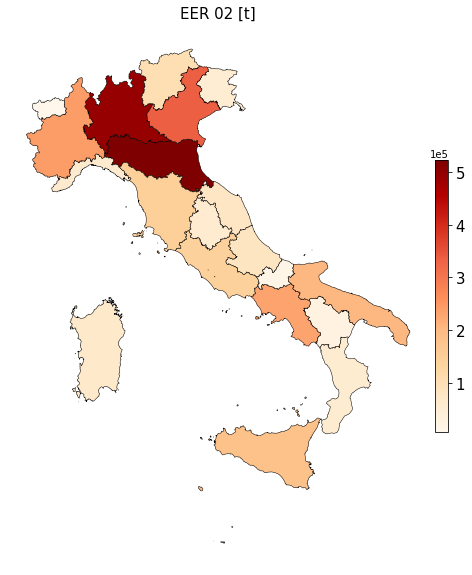

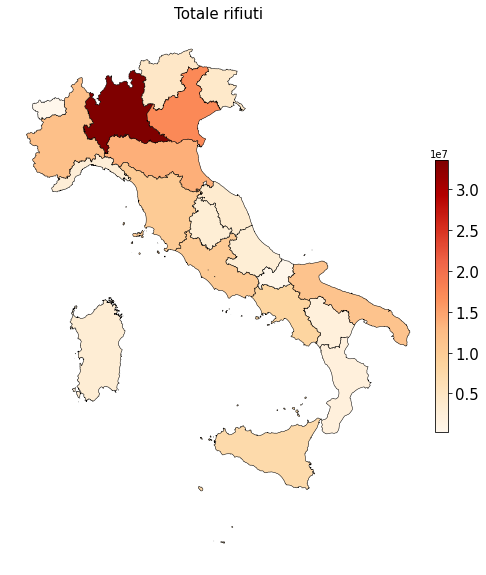

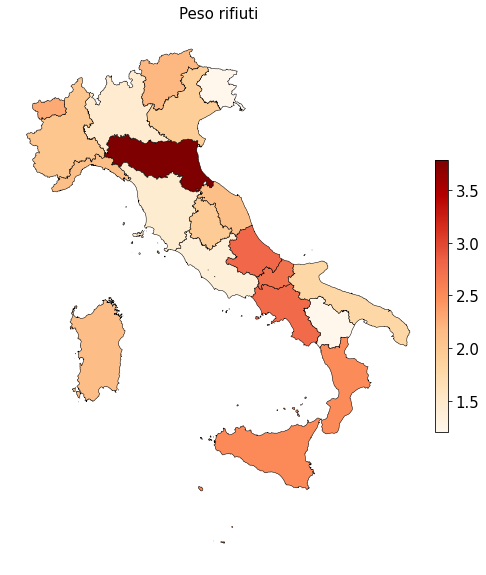

In [ ]:
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
EER = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per EER.csv')
waste_production = [ATECO, EER]

regions = ["Abruzzo","Basilicata","Calabria","Campania","EmiliaRomagna","FriuliVeneziaGiulia","Lazio","Liguria","Lombardia","Marche","Molise","Piemonte","Puglia","Sardegna","Sicilia","Toscana","TrentinoAltoAdige","Umbria","ValledAosta","Veneto"]

italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

for i in range(len(waste_production)):
  for j in range(2,5):

    map = italy.merge(waste_production[i].iloc[:,[1,j]], on = 'NOME_REG', how = 'right')


    fig, ax = plt.subplots(1, figsize=(10, 10))
    col = map.columns[5]

    #title = 'Produzione rifiuti per attività economica\n ATECO 10,11 - Industria alimentare e delle bevande'
    ax.set_title(col, fontdict={'fontsize':'15', 'fontweight':'5'}, color='Black', fontfamily='sans-serif', loc = 'center')
    map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')
    # remove the axes
    ax.set_axis_off()

    # add a colorbar to the map
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=map[col].min(), vmax=map[col].max()))
    sm._A = []
    cbar = plt.colorbar(sm, shrink=0.5, pad=0.01)
    cbar.ax.tick_params(labelsize=15)

    # Use a custom formatter to format the colorbar labels in scientific notation
    formatter = ticker.FuncFormatter(lambda x, pos: '{:0.2e}'.format(x))
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((-2, 3))
    cbar.update_ticks()
    #map

    path = f"/content/drive/MyDrive/Thesis/Graphs/Waste production per region/Waste production per region_{col}"
    fig.savefig(path, dpi=300, bbox_inches='tight')

In [ ]:
ATECO

In [ ]:
Emilia_Romagna = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/italian-maps-shapefiles-master/italian-maps-shapefiles-master/regions-with-provinces/emilia-romagna/emilia-romagna.shp')
new_provinces = pd.read_excel('/content/drive/MyDrive/Thesis/Python codes/Graphs/italian-maps-shapefiles-master/italian-maps-shapefiles-master/regions-with-provinces/emilia-romagna/emilia-romagna_con_accento.xlsx')
Emilia_Romagna['NOME_PRO'] = new_provinces['NOME_PRO']
Number_of_enterprises = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Food Industry Enterprises per Province/Number of Enterprises.csv')

# Create a figure and axis
fig, ax = plt.subplots(1, figsize = (15,15))

# Plot the entire country on the same axis
Emilia_Romagna.plot(color='white', edgecolor='black', linewidth=0.5, zorder=1, ax=ax)

# Select the region to highlight
region = Emilia_Romagna.loc[Emilia_Romagna['NOME_PRO'] == 'Rimini']

# Plot the region with a higher zorder and thicker lines to stand out on the same axis
region.plot(color='red', edgecolor='yellow', linewidth=2.5, zorder=2, ax=ax)

# Show the plot
plt.show()

In [ ]:
set1 = set(italy['NOME_REG'].tolist())
set2 = set(ATECO['NOME_REG'].tolist())

# Check if the sets are equal
if set1 == set2:
    print('Columns have the same content.')
else:
    print('Columns do not have the same content.')

Columns have the same content.
